# Homework 3

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Optimization with Gradient Descent

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [17]:
def GD(f, grad_f, x0, tolf, tolx, kmax, use_backtraking=True, a=0.2):
    # As output, we want:
    # x -> The stationary point
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of ||grad_f(x_k)||

    f_val = [f(x0)]
    err_val = [np.linalg.norm(grad_f(x0))]
    alpha = backtracking(f, grad_f, x0) if use_backtraking else a
    
    # Init iteration
    k = 0
    x = [x0]
    
    rel_tol_cond = True
    rel_inp_cond = True
    max_it_cond = True
    
    while rel_tol_cond and rel_inp_cond and max_it_cond:
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        err_val.append(np.linalg.norm(grad_f(x[k])))
        
        # Update alpha and k
        if use_backtraking:
            alpha = backtracking(f, grad_f, x[k+1])
        k += 1
        
        rel_tol_cond = np.linalg.norm(grad_f(x[k-1])) >= tolf * np.linalg.norm(grad_f(x0))
        # We skip the first iteration
        rel_inp_cond = np.linalg.norm(x[k] - x[k-1]) >= tolx
        max_it_cond = k < kmax

    return x[k], np.array(f_val), np.array(err_val), x, k

In [32]:
def GD(f, grad_f, x0, tolf, tolx, kmax, use_backtraking=True, a=0.2):
    # As output, we want:
    # x -> The stationary point
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of ||grad_f(x_k)||

    f_0 = f(x0)
    err_val_0 = np.linalg.norm(grad_f(x0))

    f_val = np.zeros((kmax + 1, ), dtype=object)
    err_val = np.zeros((kmax + 1, ), dtype=object)
    x_shape = (kmax + 1, x0.shape[0]) if len(x0.shape) < 2 else (kmax + 1, x0.shape[0], x0.shape[1])
    x = np.zeros(x_shape)
    
    f_val[0] = f_0
    err_val[0] = err_val_0
    
    alpha = backtracking(f, grad_f, x0) if use_backtraking else a
    
    # Init iteration
    k = 0
    x[0] = x0
    
    rel_tol_cond = True
    rel_inp_cond = True
    max_it_cond = True
    
    while rel_tol_cond and rel_inp_cond and max_it_cond:
        x[k+1] = x[k] - alpha * grad_f(x[k])
        f_val[k+1] = f(x[k+1])
        err_val[k+1] = np.linalg.norm(grad_f(x[k]))
        
        # Update alpha and k
        if use_backtraking:
            alpha = backtracking(f, grad_f, x[k])
        k += 1
        
        rel_tol_cond = np.linalg.norm(grad_f(x[k])) >= tolf * np.linalg.norm(grad_f(x0))
        rel_inp_cond = np.linalg.norm(x[k] - x[k-1]) >= tolx
        max_it_cond = k < kmax

    return x[k], f_val[:k+1], err_val[:k+1], x[:k+1], k

Define a function to analyze the behavior of GD

In [55]:
def analyze_GD_methods(f, grad_f, x_0, kmax=100, alpha1=0.1, alpha2=0.05, x_true=None, contour_range=None):
    def plot_error(errors, fun_labels, x_label, y_label, title):
        for error, label in zip(errors, fun_labels):
            plt.plot(error, label = label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.legend()
        plt.show()
        return

    # Use GD with backtraking
    res_back = GD(f, grad_f, x_0, 0.001, 0.001, kmax)
    x_b, f_b, err_b, xs_b, k_b = res_back

    # Use GD without backtraking and alpha2
    res_no_back1 = GD(f, grad_f, x_0, 0.001, 0.001, kmax, use_backtraking=False, a=alpha1)
    x_nb1, f_nb1, err_nb1, xs_nb1, k_nb1 = res_no_back1

    # Use GD without backtraking and alpha2
    res_no_back2 = GD(f, grad_f, x_0, 0.001, 0.001, kmax, use_backtraking=False, a=alpha2)
    x_nb2, f_nb2, err_nb2, xs_nb2, k_nb2 = res_no_back2

    plot_error([err_b, err_nb1, err_nb2], ["Backtraking", f"alpha={alpha1}", f"alpha={alpha2}"],
                "iterations", "gradient error", "Convergence speed")

    print(f"Solutions:\n Backtraking : {x_b}\n Alpha={alpha1} : {x_nb1}\n Alpha={alpha2} : {x_nb2}")
    if x_true is not None:
        print(f"True solution: {x_true}")
        # Plot the error between the computed solution and the true one
        xs_errors = []
        for xs in [xs_b, xs_nb1, xs_nb2]:
            xs_errors.append(np.linalg.norm(xs - x_true, axis=1))
        plot_error(xs_errors, ["Backtraking", f"alpha={alpha1}", f"alpha={alpha2}"],
                    "iterations", "$||x_k - x_{true}||_2$", "Relative error")

    xs_conv = []
    for xs, x in zip([xs_b, xs_nb1, xs_nb2], [x_b, x_nb1, x_nb2]):
        xs_conv.append(np.linalg.norm(xs - x, axis=1))
    plot_error(xs_conv, ["Backtraking", f"alpha={alpha1}", f"alpha={alpha2}"],
                "iterations", "$||x_k - x^*||_2$", "")

    if contour_range is not None:
        xs = np.array(xs_b)
        rx, ry = contour_range
        # Plot the contour curve
        ## Create the grid
        xv = np.linspace(rx[0], rx[1], 100)
        yv = np.linspace(rx[0], ry[1], 100)
        xx, yy = np.meshgrid(xv, yv)
        ## Compute the function
        zz = np.array([f(np.array([x, y])) for x,y in zip(xx, yy)])

        plt.title("Contour plot")
        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        cp = plt.contourf(xx, yy, zz)
        plt.colorbar(cp)
        plt.plot(xs[:, 0], xs[:, 1], "o-", c="white")
        plt.show()

Analyze the function $f(x_1, x_2) = (x_1-3)^2 + (x_2 - 1)^2$

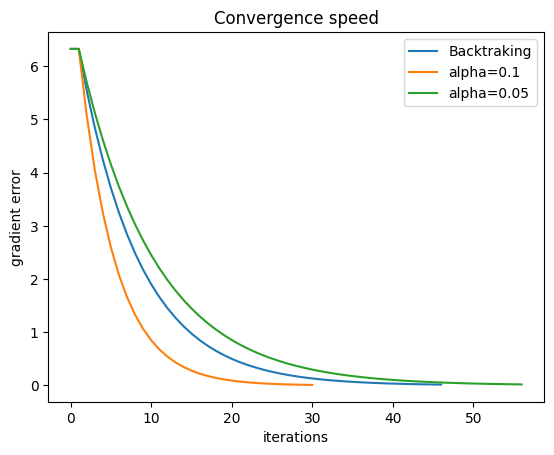

Solutions:
 Backtraking : [2.99355101 0.99785034]
 Alpha=0.1 : [2.99628618 0.99876206]
 Alpha=0.05 : [2.99178322 0.99726107]
True solution: [3 1]


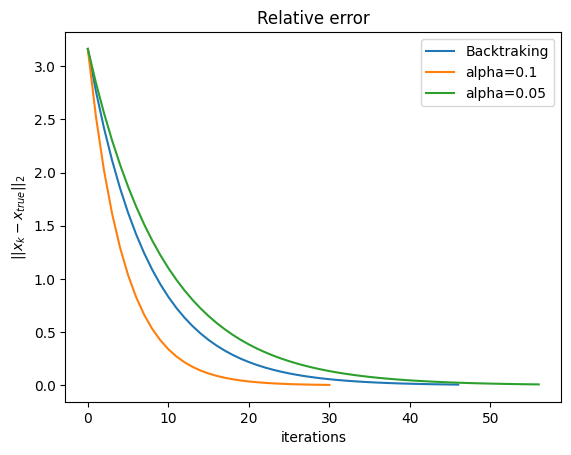

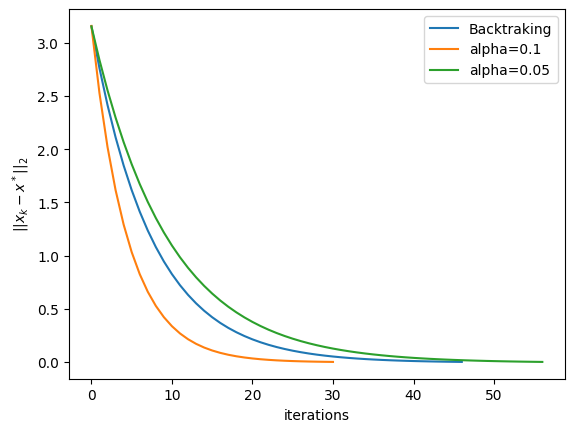

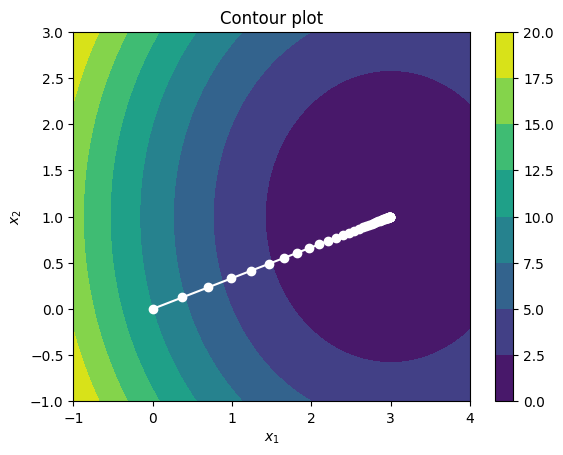

In [56]:
# define the function
def f_1(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

# define the gradient
def grad_f_1(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

# Define the true solution
x_true = np.array([3, 1])

# Analyze GD
analyze_GD_methods(f_1, grad_f_1, np.array([0,0]), x_true=x_true, contour_range=((-1, 4),(-2, 3)))

Analyze the function $f(x_1, x_2) = 10(x_1 - 1)^2 + (x_2 - 2)^2$

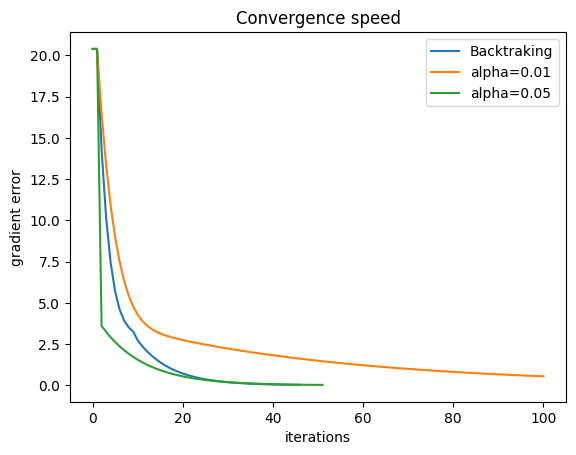

Solutions:
 Backtraking : [1.         1.99029424]
 Alpha=0.01 : [1.         1.73476089]
 Alpha=0.05 : [1.        1.9907232]
True solution: [1 2]


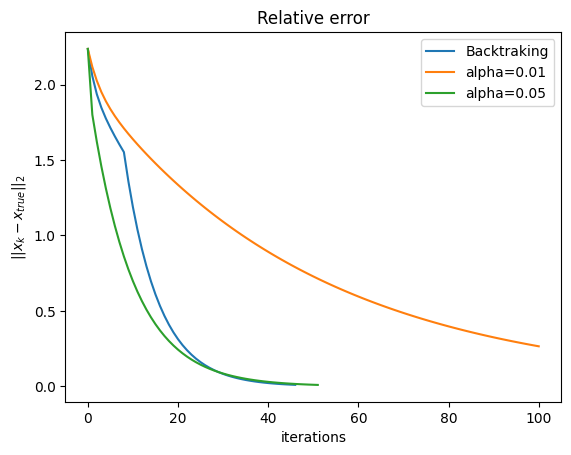

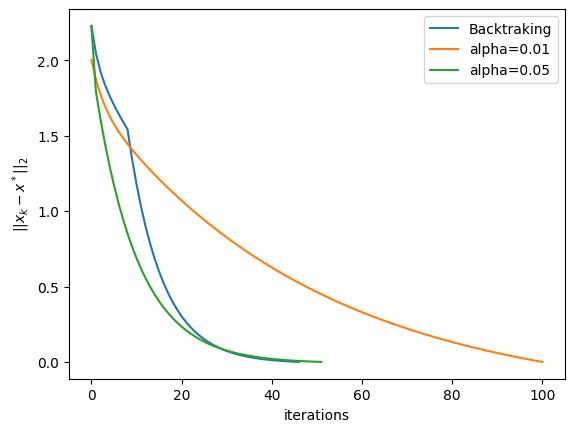

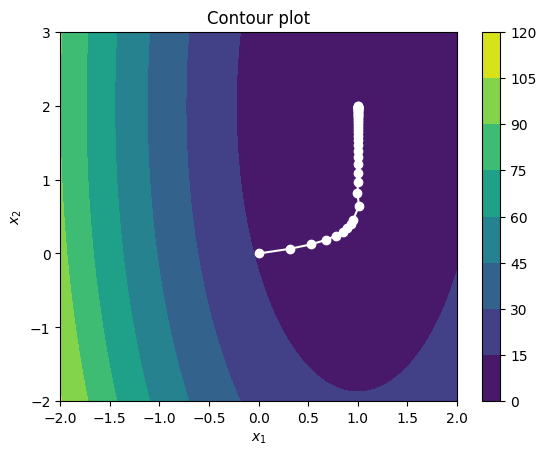

In [57]:
# define the function
def f_2(x):
    return 10*(x[0] - 1)**2 + (x[1] - 2)**2

# define the gradient
def grad_f_2(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])

# Define the true solution
x_true = np.array([1, 2])

# Analyze GD
analyze_GD_methods(f_2, grad_f_2, np.array([0,0]), x_true=x_true, alpha1=0.01, contour_range=((-2, 2), (-1, 3)))

Analyze the function $f(x)=\frac{1}{2}\|Ax-b\|_2^2$

==> Analysis with n=5


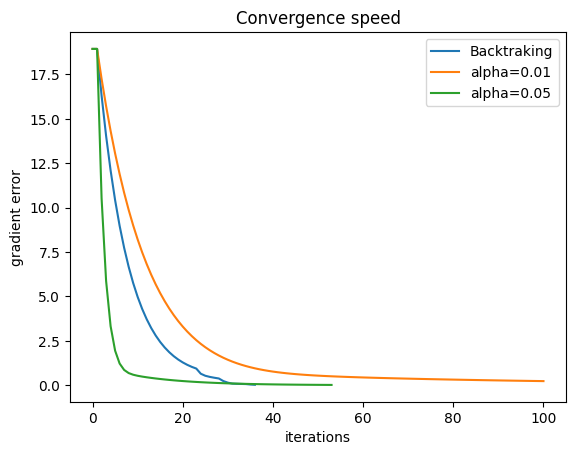

Solutions:
 Backtraking : [[0.94238516]
 [0.97396262]
 [1.01476021]
 [1.0617717 ]
 [0.98895562]]
 Alpha=0.01 : [[0.87494211]
 [0.91333192]
 [0.96730598]
 [1.04346111]
 [1.08344022]]
 Alpha=0.05 : [[0.94382159]
 [0.97474306]
 [1.01453009]
 [1.05994975]
 [0.98983793]]


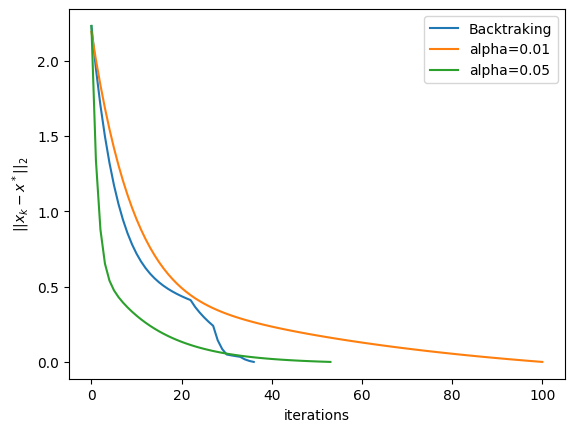

==> Analysis with n=10


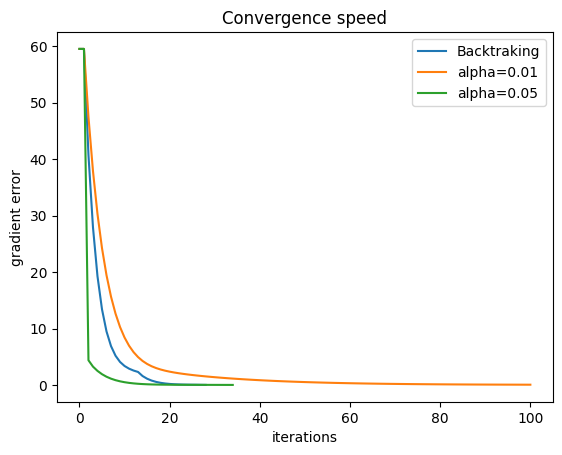

Solutions:
 Backtraking : [[0.93796899]
 [0.95169883]
 [0.9670641 ]
 [0.98407522]
 [1.00252073]
 [1.02167552]
 [1.03959356]
 [1.05121238]
 [1.0424374 ]
 [0.96763111]]
 Alpha=0.01 : [[0.91451521]
 [0.93084711]
 [0.9495058 ]
 [0.97074569]
 [0.99470322]
 [1.02114135]
 [1.04873318]
 [1.07279626]
 [1.07659429]
 [0.95698506]]
 Alpha=0.05 : [[0.93598204]
 [0.9499546 ]
 [0.96562685]
 [0.98303175]
 [1.00198985]
 [1.02182044]
 [1.04063204]
 [1.05338669]
 [1.04569576]
 [0.96599993]]


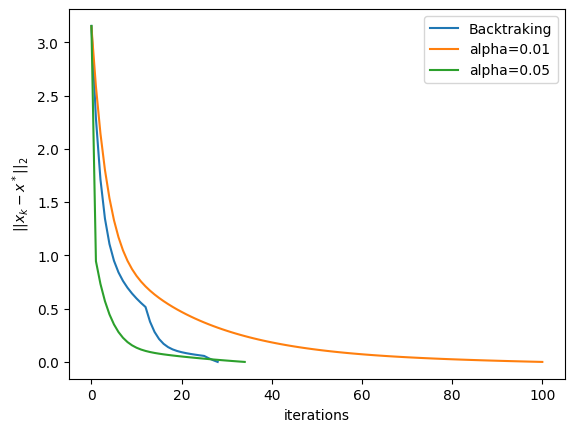

==> Analysis with n=15


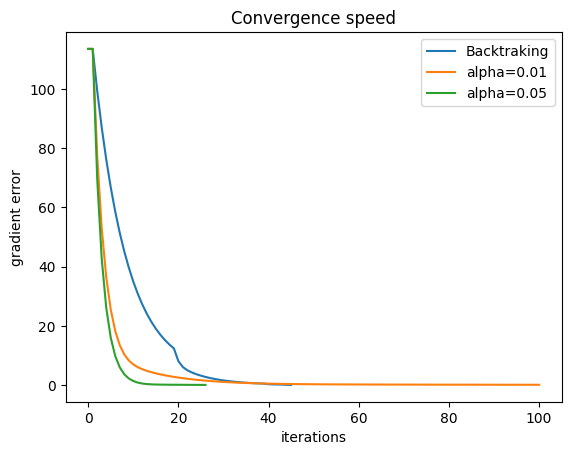

Solutions:
 Backtraking : [[0.94665373]
 [0.95499919]
 [0.96390667]
 [0.97336313]
 [0.98332355]
 [0.99369082]
 [1.0042828 ]
 [1.01477736]
 [1.02461802]
 [1.03284803]
 [1.03781145]
 [1.03661489]
 [1.02427326]
 [0.99372469]
 [0.97988279]]
 Alpha=0.01 : [[0.9279305 ]
 [0.93743727]
 [0.94770352]
 [0.9587603 ]
 [0.97061892]
 [0.98325481]
 [0.99657981]
 [1.01039344]
 [1.02429483]
 [1.0375174 ]
 [1.04860345]
 [1.05472614]
 [1.05018763]
 [1.0230104 ]
 [0.95972396]]
 Alpha=0.05 : [[0.94065523]
 [0.94932845]
 [0.95862113]
 [0.9685335 ]
 [0.97903761]
 [0.99005857]
 [1.00144343]
 [1.0129085 ]
 [1.02394781]
 [1.03366915]
 [1.04049124]
 [1.04157302]
 [1.0317904 ]
 [1.00280259]
 [0.97558838]]


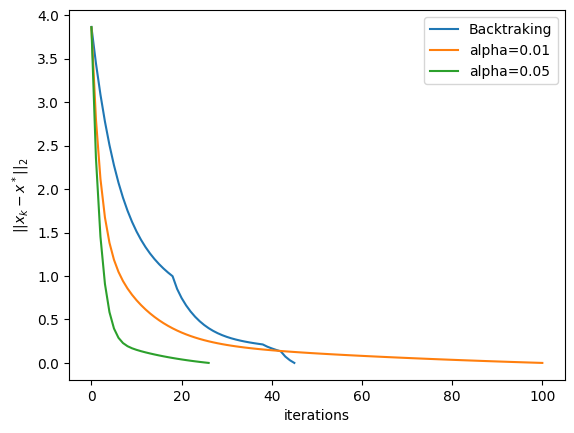

In [58]:
# This function helps us compute A and b for the f_3 function
def get_f_3_components(x):
    # Assume x is column vector
    N, _ = x.shape
    # We define A as:
    A = np.vander(np.linspace(0, 1, num=N))
    
    # We define b as
    x_true = np.ones(N)
    b = (A @ x_true).reshape((-1, 1))
    return A, b

def f_3(x):
    A, b = get_f_3_components(x)
    return 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f_3(x):
    A, b = get_f_3_components(x)
    return A.T @ (A @ x - b)

for n in range(5, 16, 5):
    print(f"==> Analysis with n={n}")
    analyze_GD_methods(f_3, grad_f_3, np.array([0 for i in range(n)]).reshape(-1 ,1), alpha1=0.01)


Analyze the function $f(x)=\frac{1}{2}\|Ax-b\|_2^2 + \frac{\lambda}{2}\|x\|^2_2$

==> Analysis with lambda=0.1


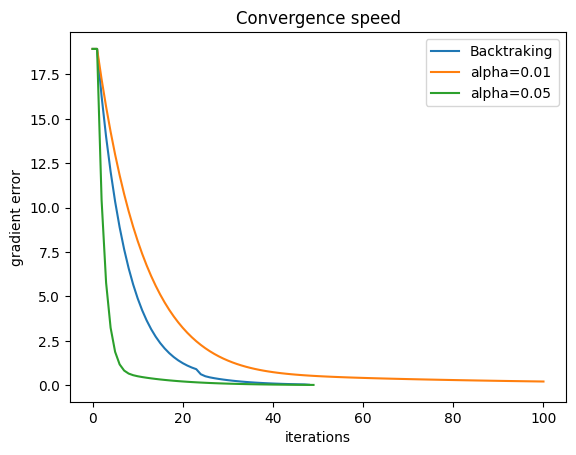

Solutions:
 Backtraking : [[0.91566687]
 [0.94834062]
 [0.99158665]
 [1.04475046]
 [1.00215675]]
 Alpha=0.01 : [[0.8589255 ]
 [0.89733571]
 [0.95166788]
 [1.02932764]
 [1.08115928]]
 Alpha=0.05 : [[0.91590202]
 [0.94840872]
 [0.99140187]
 [1.04418092]
 [1.00248674]]


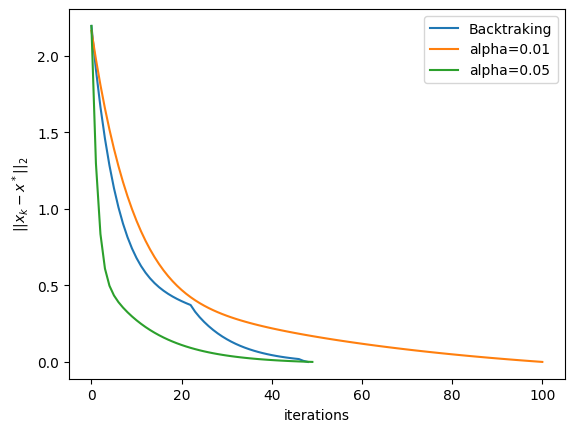

==> Analysis with lambda=0.5


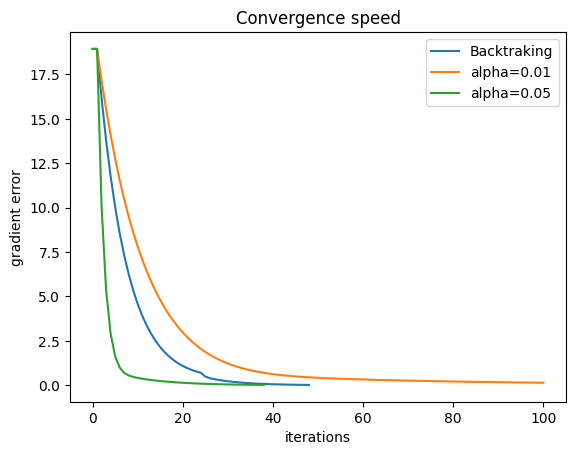

Solutions:
 Backtraking : [[0.8291981 ]
 [0.8648699 ]
 [0.91496474]
 [0.98558463]
 [1.02800085]]
 Alpha=0.01 : [[0.80100155]
 [0.83929068]
 [0.89455708]
 [0.97688608]
 [1.06830551]]
 Alpha=0.05 : [[0.82890119]
 [0.86460965]
 [0.91477212]
 [0.98553343]
 [1.02838487]]


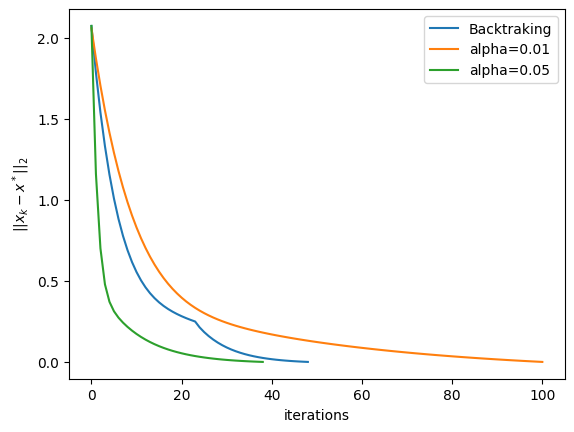

==> Analysis with lambda=0.7


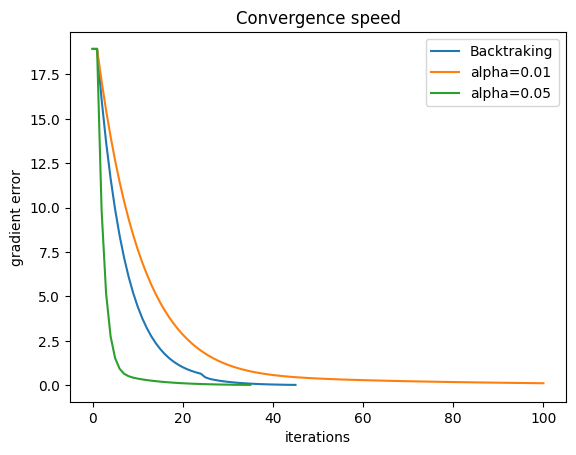

Solutions:
 Backtraking : [[0.79529422]
 [0.83163016]
 [0.88353716]
 [0.95933506]
 [1.03117917]]
 Alpha=0.01 : [[0.77526245]
 [0.8133926 ]
 [0.86887923]
 [0.95286579]
 [1.06010258]]
 Alpha=0.05 : [[0.79538089]
 [0.83170332]
 [0.88358651]
 [0.95933756]
 [1.03108   ]]


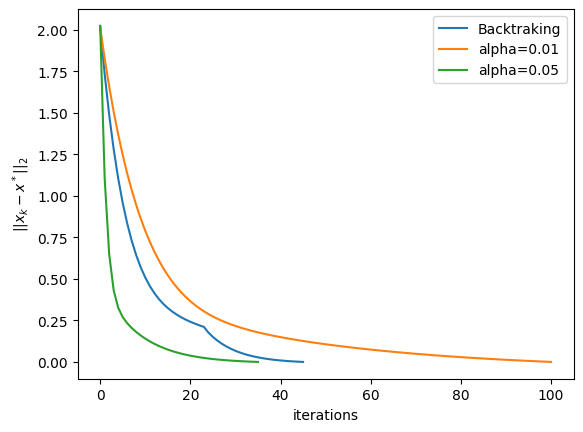

In [59]:
def get_f_4(lamb):
    def f_4(x):
        return f_3(x) + lamb/2 * (np.linalg.norm(x)**2)

    def grad_f_4(x):
        return grad_f_3(x) + lamb * x
    return f_4, grad_f_4

n = 5
for l in [0.1, 0.5, 0.7]:
    print(f"==> Analysis with lambda={l}")
    f_4, grad_f_4 = get_f_4(l)
    analyze_GD_methods(f_4, grad_f_4, np.array([0 for i in range(n)]).reshape(-1 ,1), alpha1=0.01)


Analyze the function $f(x)=x^4 + x^3 -2x^2 -2x$

==> Starting point is -3


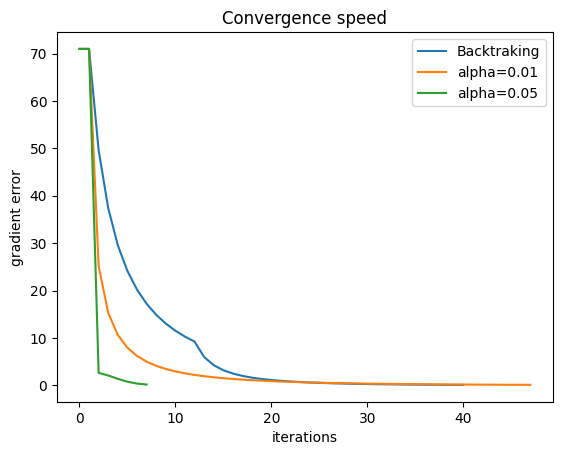

Solutions:
 Backtraking : [-1.24220263]
 Alpha=0.01 : [-1.24484408]
 Alpha=0.05 : [0.91632074]


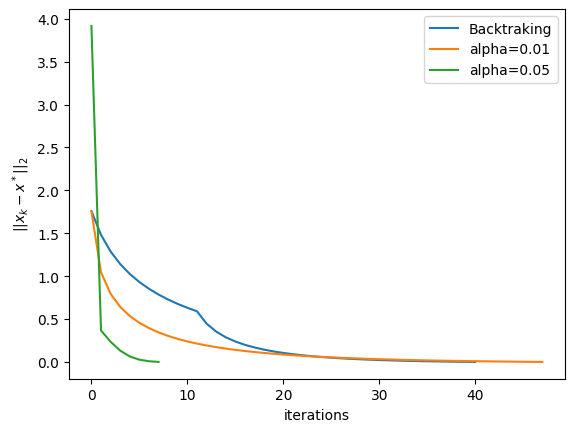

==> Starting point is 0


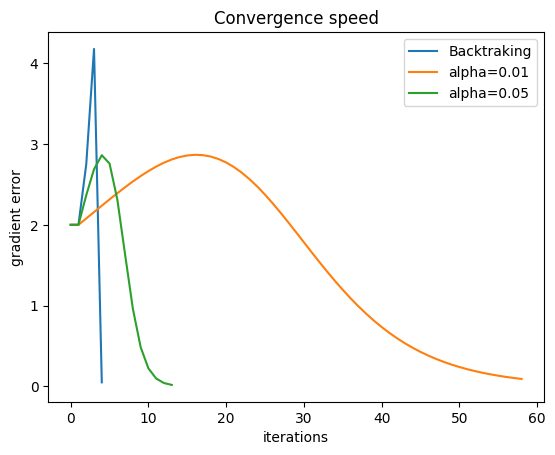

Solutions:
 Backtraking : [0.92557375]
 Alpha=0.01 : [0.91532447]
 Alpha=0.05 : [0.92163279]


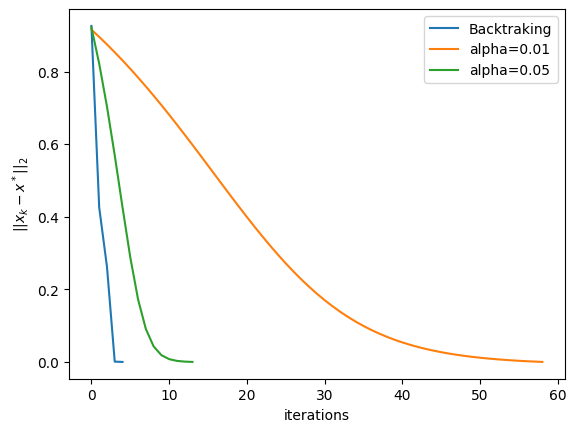

In [60]:
def f_5(x):
    return x**4 + x**3 + -2*x**2 -2*x

def grad_f_5(x):
    return 4*x**3 + 3*x**2 + -4*x -2

print("==> Starting point is -3")
analyze_GD_methods(f_5, grad_f_5, np.array([-3]), alpha1=0.01)
print("==> Starting point is 0")
analyze_GD_methods(f_5, grad_f_5, np.array([0]), alpha1=0.01)


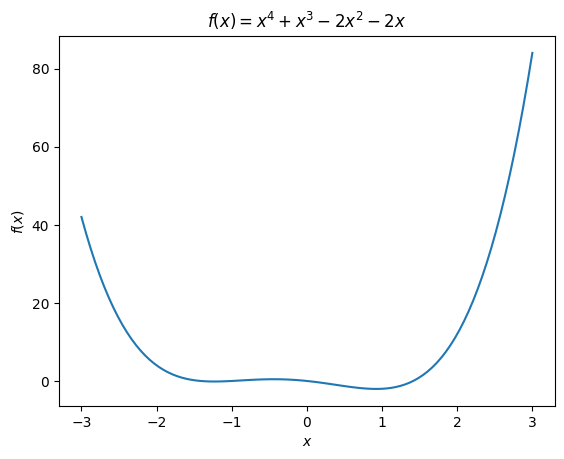

In [61]:
# Plot the function in [-3, 3]
plt.title("$f(x)=x^4 + x^3 -2x^2 -2x$")
xs = np.linspace(-3, 3, 100)
plt.plot(xs, [f_5(x) for x in xs])
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()